## Libraries

In [1]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from confidenceinterval.ModelEvaluationUtils import (
    train_and_evaluate_sofa,
    z_score,
    plot_roc_auc,
    train_and_evaluate_models, 
    calculate_ci_models, 
    plot_roc_auc_models,
    select_data
)
from confidenceinterval.goldstandard import (
    evaluation_metrics,
    max_th_f1
)

## Load the data, All variables

In [2]:
x_train, x_test, y_train, y_test = select_data('johan_variables', 68, 'ya_imputados/mimic4872f_complete.csv', 'ya_imputados/eicu4872f_complete.csv') 
x_train.shape, x_test.shape, y_train.shape, y_test.shape # Print the shapes of the training and testing data and labels

((7511, 68), (3786, 68), (7511,), (3786,))

## Models

In [3]:
models = [LogisticRegression(solver= "sag"), #Stochastic Average Gradient (SAG) is efficient for large datasets by updating model parameters with small random batches, reducing computation time.
          SVC(probability=True), #probability=True enables probability estimates using 5-fold cross-validation.
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          GradientBoostingClassifier(),
          MLPClassifier(),
          XGBClassifier(),
          LGBMClassifier()]

## Training and Testing the model

In [4]:
# z-score the data
x_train_z, x_test_z = z_score(x_train, x_test)
# stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# train and evaluate the model
results = train_and_evaluate_models(x_train_z, y_train, x_test_z, y_test, skf, models)


Training and evaluating model: LogisticRegression


c:\Users\JOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 1: Train AUC: 0.8843
 Validation AUC: 0.8825
 Test AUC: 0.8203


c:\Users\JOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 2: Train AUC: 0.8878
 Validation AUC: 0.8749
 Test AUC: 0.8164


c:\Users\JOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 3: Train AUC: 0.8888
 Validation AUC: 0.8649
 Test AUC: 0.8188


c:\Users\JOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 4: Train AUC: 0.8847
 Validation AUC: 0.8846
 Test AUC: 0.8212


c:\Users\JOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 5: Train AUC: 0.8893
 Validation AUC: 0.8688
 Test AUC: 0.8182
Training and evaluating model: SVC
Fold 1: Train AUC: 0.9608
 Validation AUC: 0.8701
 Test AUC: 0.7910
Fold 2: Train AUC: 0.9614
 Validation AUC: 0.8823
 Test AUC: 0.7820
Fold 3: Train AUC: 0.9631
 Validation AUC: 0.8535
 Test AUC: 0.7753
Fold 4: Train AUC: 0.9575
 Validation AUC: 0.8835
 Test AUC: 0.7816
Fold 5: Train AUC: 0.9573
 Validation AUC: 0.8714
 Test AUC: 0.7671
Training and evaluating model: DecisionTreeClassifier
Fold 1: Train AUC: 1.0000
 Validation AUC: 0.6618
 Test AUC: 0.6162
Fold 2: Train AUC: 1.0000
 Validation AUC: 0.6860
 Test AUC: 0.6025
Fold 3: Train AUC: 1.0000
 Validation AUC: 0.6551
 Test AUC: 0.5864
Fold 4: Train AUC: 1.0000
 Validation AUC: 0.6770
 Test AUC: 0.6096
Fold 5: Train AUC: 1.0000
 Validation AUC: 0.6538
 Test AUC: 0.5908
Training and evaluating model: RandomForestClassifier
Fold 1: Train AUC: 1.0000
 Validation AUC: 0.8633
 Test AUC: 0.8012
Fold 2: Train AUC: 1.0000
 Validation AUC

c:\Users\JOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 1: Train AUC: 1.0000
 Validation AUC: 0.8473
 Test AUC: 0.7490


c:\Users\JOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 2: Train AUC: 1.0000
 Validation AUC: 0.8371
 Test AUC: 0.7476


c:\Users\JOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 3: Train AUC: 1.0000
 Validation AUC: 0.8464
 Test AUC: 0.7493


c:\Users\JOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 4: Train AUC: 1.0000
 Validation AUC: 0.8445
 Test AUC: 0.7471


c:\Users\JOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 5: Train AUC: 1.0000
 Validation AUC: 0.8379
 Test AUC: 0.7237
Training and evaluating model: XGBClassifier
Fold 1: Train AUC: 1.0000
 Validation AUC: 0.8826
 Test AUC: 0.8121
Fold 2: Train AUC: 1.0000
 Validation AUC: 0.8944
 Test AUC: 0.8045
Fold 3: Train AUC: 1.0000
 Validation AUC: 0.8827
 Test AUC: 0.8172
Fold 4: Train AUC: 1.0000
 Validation AUC: 0.8869
 Test AUC: 0.8086
Fold 5: Train AUC: 1.0000
 Validation AUC: 0.8741
 Test AUC: 0.7911
Training and evaluating model: LGBMClassifier
[LightGBM] [Info] Number of positive: 932, number of negative: 5076
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002359 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7127
[LightGBM] [Info] Number of data points in the train set: 6008, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.155126 -> initscore=-1.694946
[LightGBM] [Info] Start training from score -1.694946
Fold 1: Tra

### Validation data result

In [5]:
# Calculate AUC and confidence intervals for validation data
auc_results_val= calculate_ci_models(results, truth_key='val_truths', preds_key='val_preds', alpha=0.95)

for model_name, auc, (ci_lower, ci_upper) in auc_results_val:
    print(f"AUC on validation data for {model_name}: {auc:.4g} 95% CI ({ci_lower:.4g} - {ci_upper:.4g})")


AUC on validation data for LogisticRegression: 0.875 95% CI (0.8675 - 0.8825)
AUC on validation data for SVC: 0.872 95% CI (0.8645 - 0.8796)
AUC on validation data for DecisionTreeClassifier: 0.6668 95% CI (0.6561 - 0.6774)
AUC on validation data for RandomForestClassifier: 0.8706 95% CI (0.863 - 0.8781)
AUC on validation data for GradientBoostingClassifier: 0.8916 95% CI (0.8845 - 0.8986)
AUC on validation data for MLPClassifier: 0.8428 95% CI (0.8346 - 0.851)
AUC on validation data for XGBClassifier: 0.8842 95% CI (0.8769 - 0.8914)
AUC on validation data for LGBMClassifier: 0.8922 95% CI (0.8852 - 0.8992)


### Test data result

In [6]:
# Calculate AUC and confidence intervals for validation data
auc_results_test = calculate_ci_models(results, truth_key='test_truths', preds_key='test_preds', alpha=0.95)

for model_name, auc, (ci_lower, ci_upper) in auc_results_test:
    print(f"AUC on test data for {model_name}: {auc:.4g} 95% CI ({ci_lower:.4g} - {ci_upper:.4g})")

AUC on test data for LogisticRegression: 0.819 95% CI (0.8135 - 0.8244)
AUC on test data for SVC: 0.7792 95% CI (0.7733 - 0.7852)
AUC on test data for DecisionTreeClassifier: 0.6011 95% CI (0.5941 - 0.6081)
AUC on test data for RandomForestClassifier: 0.8041 95% CI (0.7984 - 0.8097)
AUC on test data for GradientBoostingClassifier: 0.8167 95% CI (0.8112 - 0.8222)
AUC on test data for MLPClassifier: 0.7419 95% CI (0.7357 - 0.7482)
AUC on test data for XGBClassifier: 0.8064 95% CI (0.8008 - 0.8121)
AUC on test data for LGBMClassifier: 0.8171 95% CI (0.8116 - 0.8226)


## ROC curve - Train

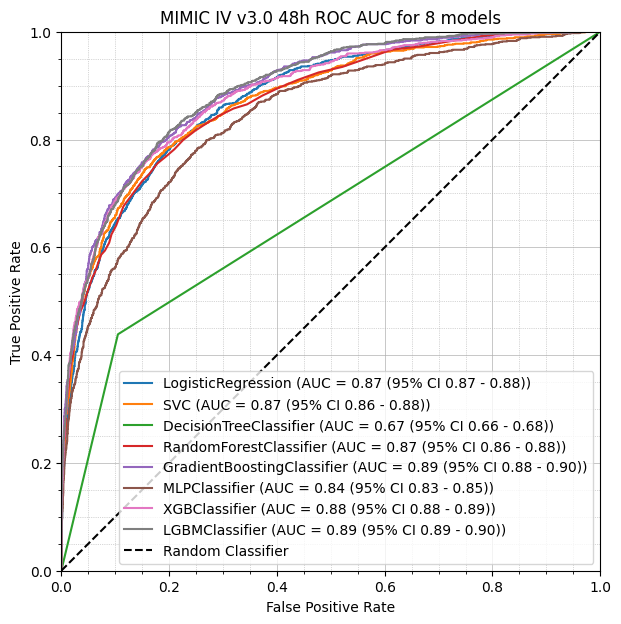

In [7]:
plot_roc_auc_models(results, 'val_truths', 'val_preds', auc_results_val,'MIMIC IV v3.0 48h ROC AUC for 8 models')

## ROC curve - Test

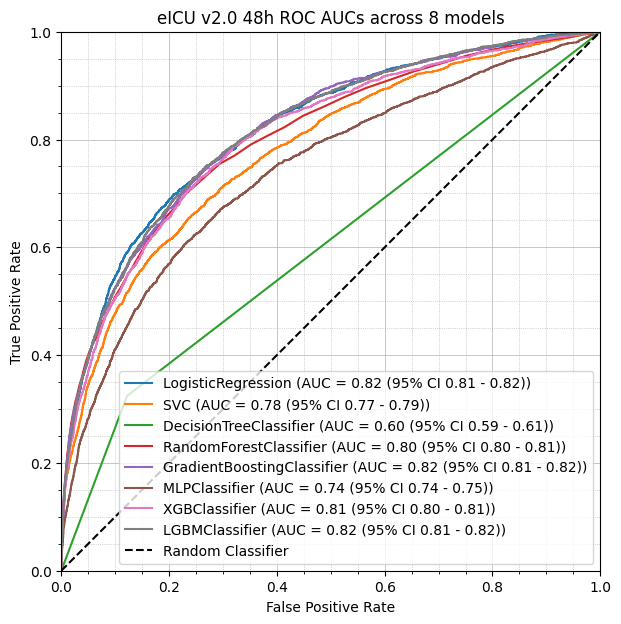

In [8]:
plot_roc_auc_models(results, 'test_truths', 'test_preds', auc_results_test,'eICU v2.0 48h ROC AUCs across 8 models')

## ROC curve - SOFA

AUC on validation data for SOFA: 0.6846 95% CI (0.6741 - 0.6951)
AUC on test data for SOFA: 0.7421 95% CI (0.7281 - 0.756)


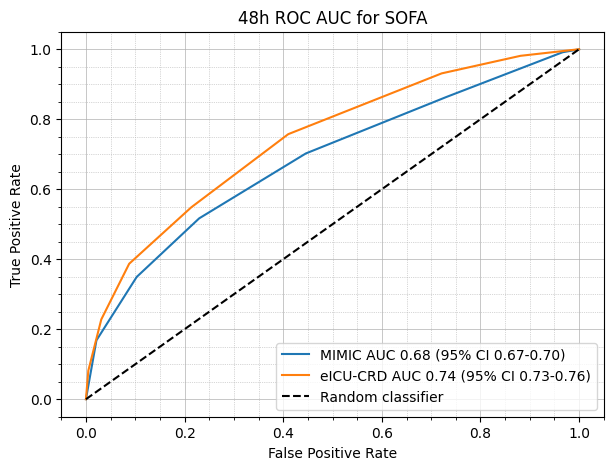

In [3]:
x_train_sofa, x_test_sofa, y_train_sofa, y_test_sofa = select_data('SOFA', 1, 'ya_imputados/mimic4872f_complete.csv', 'ya_imputados/eicu4872f_complete.csv') 
results_sofa = train_and_evaluate_sofa(x_train_sofa, y_train_sofa, x_test_sofa, y_test_sofa)
auc_results_val_sofa= calculate_ci_models(results_sofa, truth_key='val_truths', preds_key='val_preds', alpha=0.95)
auc_results_test_sofa = calculate_ci_models(results_sofa, truth_key='test_truths', preds_key='test_preds', alpha=0.95)
for model_name, auc, (ci_lower, ci_upper) in auc_results_val_sofa:
    print(f"AUC on validation data for {model_name}: {auc:.4g} 95% CI ({ci_lower:.4g} - {ci_upper:.4g})")
for model_name, auc, (ci_lower, ci_upper) in auc_results_test_sofa:
    print(f"AUC on test data for {model_name}: {auc:.4g} 95% CI ({ci_lower:.4g} - {ci_upper:.4g})")
_=plot_roc_auc(results_sofa['SOFA']['val_truths'], results_sofa['SOFA']['val_preds'], results_sofa['SOFA']['test_truths'], results_sofa['SOFA']['test_preds'], auc_results_val_sofa[0][2][0], auc_results_val_sofa[0][2][1], auc_results_test_sofa[0][2][0], auc_results_test_sofa[0][2][1],'48h ROC AUC for SOFA')

## Evaluation Metrics

### LGBM with Fine Tuning - Optuna

In [10]:
modelsft = [LGBMClassifier(objective='binary',
                               boosting_type='gbdt',
                               metric='auc',
                               device_type='gpu',
                               importance_type='gain',
                               verbosity=2,
                               feature_pre_filter=False,  
                               lambda_l1= 0.0,
                               lambda_l2= 0.0,
                               num_leaves= 221,
                               max_depth= 10,
                               learning_rate= 0.1,
                               feature_fraction= 0.5,
                               bagging_fraction= 1.0,
                               bagging_freq=0,
                               min_child_samples= 20)]

Training and evaluating model: LGBMClassifier
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 wil

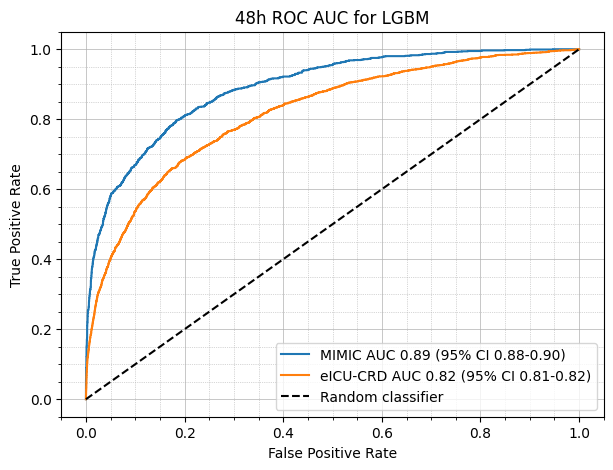

In [11]:
# z-score the data
x_train_ft, x_test_ft = z_score(x_train, x_test)
# stratified k-fold cross-validation
skfft = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# train and evaluate the model
resultsft = train_and_evaluate_models(x_train_ft, y_train, x_test_ft, y_test, skfft, modelsft)
# Calculate AUC and confidence intervals for validation data
auc_results_valft= calculate_ci_models(resultsft, truth_key='val_truths', preds_key='val_preds', alpha=0.95)
for model_name, auc, (ci_lower, ci_upper) in auc_results_valft:
    print(f"AUC on validation data for {model_name}: {auc:.4g} 95% CI ({ci_lower:.4g} - {ci_upper:.4g})")
# Calculate AUC and confidence intervals for test data
auc_results_testft = calculate_ci_models(resultsft, truth_key='test_truths', preds_key='test_preds', alpha=0.95)
for model_name, auc, (ci_lower, ci_upper) in auc_results_testft:
    print(f"AUC on test data for {model_name}: {auc:.4g} 95% CI ({ci_lower:.4g} - {ci_upper:.4g})")
fpr_valft, tpr_valft, th_valft, fpr_testft, tpr_testft, th_testft = plot_roc_auc(resultsft['LGBMClassifier']['val_truths'], resultsft['LGBMClassifier']['val_preds'], resultsft['LGBMClassifier']['test_truths'], resultsft['LGBMClassifier']['test_preds'], auc_results_valft[0][2][0], auc_results_valft[0][2][1], auc_results_testft[0][2][0], auc_results_testft[0][2][1],'48h ROC AUC for LGBM')

## Max F1 - validation 


Optimal Threshold for Maximum F1 Score: 0.2164
Maximum F1 Score: 0.6294


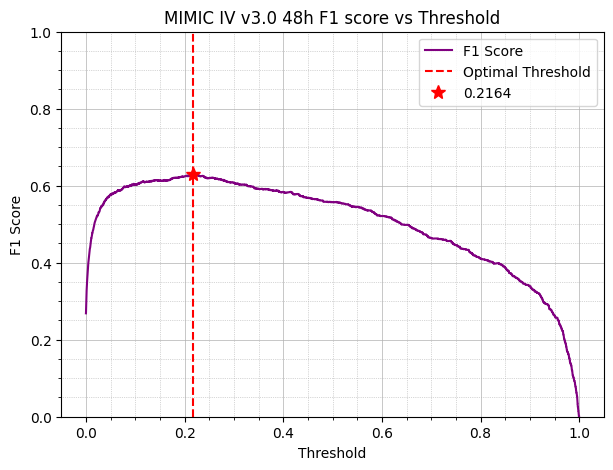

Validation results:
Threshold: 0.2164
Precision: 0.6759
Recall: 0.5888
F1 Score: 0.6294


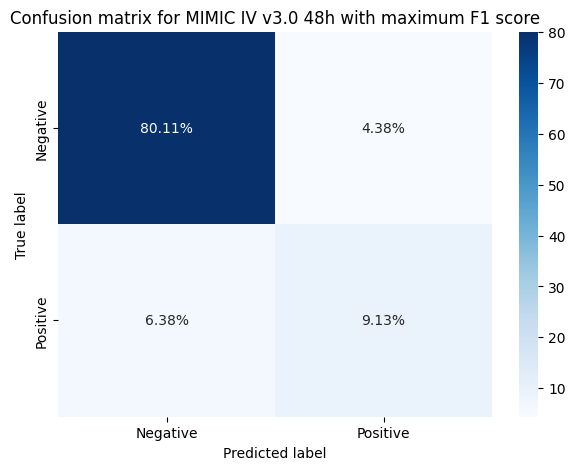

Test results:
With the validation threshold: 0.2164
Precision: 0.5324
Recall: 0.4096
F1 Score: 0.4630


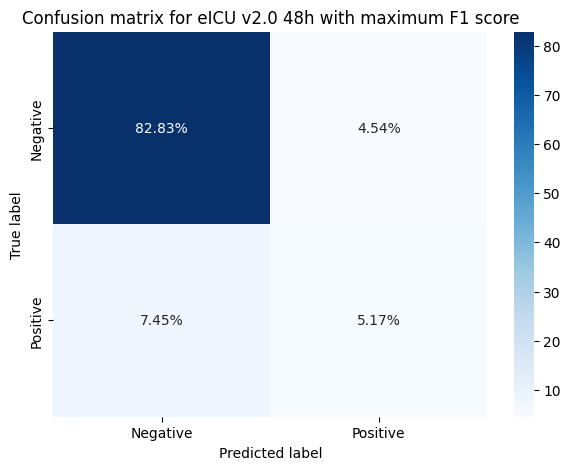

In [15]:
max_th_f1(th_valft,resultsft['LGBMClassifier']['val_truths'],resultsft['LGBMClassifier']['val_preds'],  resultsft['LGBMClassifier']['test_truths'],resultsft['LGBMClassifier']['test_preds'],'Confusion matrix for MIMIC IV v3.0 48h with maximum F1 score','Confusion matrix for eICU v2.0 48h with maximum F1 score','MIMIC IV v3.0 48h F1 score vs Threshold')